<a href="https://colab.research.google.com/github/aiml20230055/Coursework/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [15]:
dataset =  datasets.fetch_california_housing()
print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
print(dataset.keys())  # if you want to know what else is there in this dataset
dataset.target = dataset.target.astype(np.int) # so that we can classify
print(dataset.data.shape)
print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<ipython-input-15-d89ecb46a347>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [32]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))

  split1 = rnd<percent
  split2 = rnd>=percent
  # print(split1, split2, len(split1), len(split2))
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [29]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

[False False False ... False False False] [ True  True  True ...  True  True  True] 20640 20640
Number of test samples =  4165
Number of other samples =  16475
Percent of test data =  20.17926356589147 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [33]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

print('Number of train samples = ', len(traindata))
print('Number of validation samples = ', len(valdata))


Number of train samples =  12364
Number of validation samples =  4111


What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [34]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.3493067380199465
Validation accuracy using random classifier is  0.17149112138165895


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [36]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.33460216110019647


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [12]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

For NN classifer:

1. Although the results are marginally random due to the use of random generator, increasing the percentage of validation set decreases the accuracy of the classifier, ever so slightly,viz. the difference is quite small. Reducing its size is increasing the accuracy slightly, which seems intuitive.

2. As size of validation data increases, the classifier starts to perform a bit less accurate due to the fact that it needs to "fit" the data of validation as well.

3. It may depend on the algorithm used and the problem at hand, but it can be said that a ratio of 60 - 75 % of training set, 20 to 15% of validation set and 20 to 15 % of testing set may cover both accuracy and robust testing.

The graph for the above is plotted in subsequent code sections

For random classifer:

From repetitive execution of the random classifer and by looking at its plot for various split values, it is evident that the random classifier produces accuracies which are random and do not conform to any patter, which is understandable as all it does is output random predictions.

Accuracy for 10 % split = 0.29407819730400375
Accuracy for 20 % split = 0.31195445920303605
Accuracy for 30 % split = 0.3193465176268272
Accuracy for 40 % split = 0.32452944748026713
Accuracy for 50 % split = 0.3322838459675466
Accuracy for 60 % split = 0.32694938440492477
Accuracy for 70 % split = 0.34153283187639766


Text(0, 0.5, 'Accuracy')

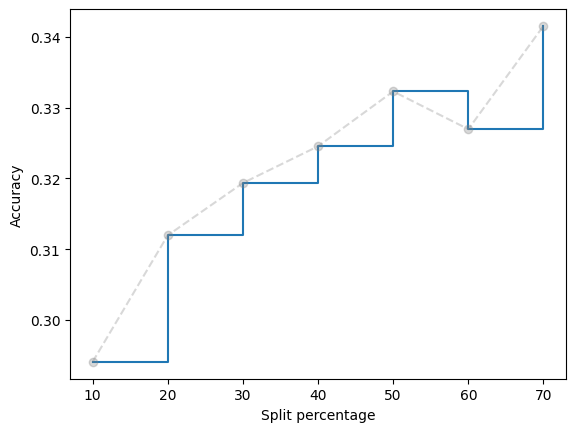

In [46]:
#Checking accuracies for various splits using NN classifier

arr = [x for x in range(10,71,10)]



results = []
for i in arr:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  results.append(valAccuracy)
  print(f"Accuracy for {i} % split = {valAccuracy}")
# plt.step(arr, results)
# plt.show()

plt.plot(arr, results, drawstyle='steps-post')
plt.plot(arr, results, 'o--', color='grey', alpha=0.3, )
plt.xlabel("Split percentage")
plt.ylabel("Accuracy")


Accuracy for 10 % split = 0.16937339288131006
Accuracy for 20 % split = 0.16149773071104387
Accuracy for 30 % split = 0.16778697001034126
Accuracy for 40 % split = 0.17089506799269333
Accuracy for 50 % split = 0.1710989678202793
Accuracy for 60 % split = 0.16275883069427527
Accuracy for 70 % split = 0.15427509293680297


Text(0, 0.5, 'Accuracy')

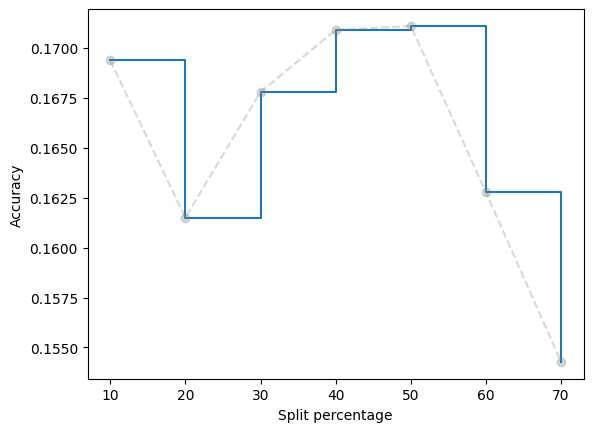

In [54]:
#The same, but for random classifier

arr = [x for x in range(10,71,10)]



results = []
for i in arr:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  results.append(valAccuracy)
  print(f"Accuracy for {i} % split = {valAccuracy}")
# plt.step(arr, results)
# plt.show()

plt.plot(arr, results, drawstyle='steps-post')
plt.plot(arr, results, 'o--', color='grey', alpha=0.3, )
plt.xlabel("Split percentage")
plt.ylabel("Accuracy")

In [47]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 10/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour for 1 % is ", valAccuracy)

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 99/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour for 99 % is ", valAccuracy)

Validation accuracy of nearest neighbour for 1 % is  0.298012798922196
Validation accuracy of nearest neighbour for 99 % is  0.3684210526315789


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [55]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [57]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 50, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.342878107946299
test accuracy is  0.3433373349339736


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1. As an average is a central tendency over a set, it has potential to give a consistend and close to the truth value of the accuracy.

2. Not necessarily, as the test data would not affect the process of training (train + cross-validation). Test data is used only once, and the model is trained on the cross-validation data. Although, some exceptions may occur depending on the data, algorithm used, etc.

3. As seen on code cell 57, iterating 50 times instead of 10 did not increase the accuracy significantly.

4. Increasing the number of iterations might result in overfitting, and  time taken to compute the average would increase substantially. Increasing it five times had made the waiting time approximately 12 times.
